In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
from unidecode import unidecode
import json
from typing import Dict,List

In [2]:
data_raw=[]
pattern=re.compile(r"https://www\.rottentomatoes\.com/m/([^/]+)")
grade_exception=set()
grade_map = {
    "F-": 0,
    "F": 1,
    "F+": 2,
    "D-": 3,
    "D": 4,
    "D+": 5,
    "C-": 6,
    "C": 7,
    "C+": 8,
    "B-": 9,
    "B": 10,
    "B+": 11,
    "A-": 12,
    "A": 13,
    "A+": 14
}
def parseGrade(grade:str):
    if grade is None:
        return None
    grade=grade.replace(" ","")
    try:
        grade=float(grade)
        max_grade=1
        while(max_grade<grade):
            max_grade*=10
        return grade/max_grade
    except:
        pass
    num_score=re.search(r"(?P<first>(\d+\.*\d*)|(\.\d+))/(?P<second>(\d+\.*\d*)|(\.\d+))",grade)
    if num_score and num_score.group("first") and num_score.group("second"):
        try:
            return float(num_score.group("first"))/float(num_score.group("second"))
        except:
            return grade
    alphabet_score=re.search(r"(\w) *(\+|-)*",grade)
    if alphabet_score and alphabet_score.group(1):
        try:
            submark=alphabet_score.group(2)
        except:
            pass
        if not submark:
            submark=""
        _abcgrade=alphabet_score.group(1).upper()+submark
        if _abcgrade in grade_map:
            return grade_map[_abcgrade]/grade_map["A+"]
    grade_exception.add(grade)
    # print(f"\{grade}\\")
    return grade
with open("review_list","r") as f:
    i=0
    for line in f:
        # i+=1
        # print(i)
        movie:Dict=json.loads(line)
        for k,v in movie.items():
            movie=pattern.search(k)
            if movie is not None:
                movie=movie[1]
            for review in v:
                additional:List[str]=[r.strip() for r in review["additional"].split("|")]
                grade,date=None,None
                if len(additional)==3:
                    try:
                        _grade=re.search(r"Original Score: +(.+)",additional[1]).group(1)
                        grade=parseGrade(_grade)
                        if(grade and type(grade)!= str and grade>1 ):
                            # print("Discard parsed",_grade)
                            grade=_grade
                        date=additional[2]
                    except:
                        print(review)
                        grade=None
                elif len(additional)==2:
                    date=additional[1]
                else:
                    raise NotImplemented
                review.update({"date":date,"grade":grade})
                data_raw.append(dict(review,**{"movie":movie}))

{'critic': 'Jake Peffer', 'publication': 'Battle Royale With Cheese', 'state': 'fresh', 'review': 'The Little Mermaid (2023) is one of the best Disney live action remakes.', 'additional': 'Full Review | Original Score: | Jun 5, 2023'}


In [3]:
print(grade_exception)

{'LESSTHANZEROSTARS', 'StronglyNotRecommended', '4outof5stars', '0outof-4..+4', '*', '3.5.5', '-1outof-4..+4', 'zb', 'low-2outof-4..+4', '2Ripples', '2.5outof10', 'outof4', '+', '2.5.5', '1-5Stars', '7.3outof10', 'high-2outof-4..+4', 'Recomended', 'r', '*****', '1.5.5', '+3outof-4..+4', '3outof5', 'low+2outof-4..+4', '7.5.10', '-3outof-4..+4', 'HighRental', '2:4', 'low0outof-4..+4', '5stars', '3.5.4', '0outof10', '3.5?4', 'high-1outof-4..+4', '3out5', '1-5', '1.5outof5', "'1.5'", '3Ripples', '8outof10', '7.8outof10', 'Rental', '2.5of4', 'LowBigScreenWatch', 'Matinee', '2.5Ripples', '1of5', 'twostars', '4outof10', 'TWOSTARS', '3,5.5', 'low+3outof-4..+4', '0outof5', 'high0outof-4..+4', '7.5outof10', '2.5/', 'n', '2.5stars', 'Schmoeditup', 'high+3outof-4..+4', '4\\5', "3outta5ain'tgreat", '4.5outof5', '3outof5airtanks', 'LowHalfPrice', '4.5of5', '6.8outof10', '2of5', '3-4', 'low1outof-4..+4', '7.0outof10', 'THREESTARS', '2.5outof5', '4of5', '4:4', '4stars', '10outof10', '3outof4', 'low-1o

In [4]:
df=pd.DataFrame(data_raw)
df

,critic,publication,state,review,additional,date,grade,movie
0,Frederic and Mary Ann Brussat,Spirituality & Practice,fresh,A sense-luscious triumph with its exquisite da...,"Full Review | Original Score: 4/5 | Jul 25, 2005","Jul 25, 2005",0.8,riverdance_the_show
1,Mike Massie,Gone With The Twins,rotten,At least it provides a constant source of unin...,"Full Review | Original Score: 2/10 | Nov 26, 2020","Nov 26, 2020",0.2,lake_placid_2
2,Tim Brayton,Alternate Ending,rotten,"As formulaic killer animal films go, any halfw...","Full Review | Original Score: 2/5 | Jun 5, 2020","Jun 5, 2020",0.4,lake_placid_2
3,Ed Travis,Hollywood Jesus,rotten,"Do yourselves a favor, skip Lake Placid 2.","Full Review | Apr 10, 2020","Apr 10, 2020",None,lake_placid_2
4,Brian Orndorf,Blu-ray.com,rotten,Gone are the cheeky impulses and amusing thesp...,"Full Review | Original Score: D | Nov 12, 2017","Nov 12, 2017",0.285714,lake_placid_2
...,...,...,...,...,...,...,...,...
1159523,Frank Swietek,One Guy's Opinion,rotten,"Cheerful enough, but it really doesn't tell us...","Full Review | Original Score: C+ | Mar 5, 2001","Mar 5, 2001",0.571429,when_brendan_met_trudy
1159524,Christopher Null,Filmcritic.com,fresh,One of the liveliest comedies to come along in...,"Full Review | Original Score: 4/5 | Feb 20, 2001","Feb 20, 2001",0.8,when_brendan_met_trudy
1159525,Emanuel Levy,Variety,rotten,Recreations of scenes from Breathless and The ...,"Full Review | Feb 7, 2001","Feb 7, 2001",None,when_brendan_met_trudy
1159526,Jon Popick,Planet S Magazine,fresh,Surprisingly fresh thanks to the great chemist...,"Full Review | Feb 7, 2001","Feb 7, 2001",None,when_brendan_met_trudy


In [5]:
good_grade=df[df["grade"].map(lambda x: x is not None and type(x) is not str and x>0.9)]
false_grade=good_grade[good_grade["state"]=="rotten"]
df.iloc[false_grade.index,df.columns.get_loc("grade")]=None

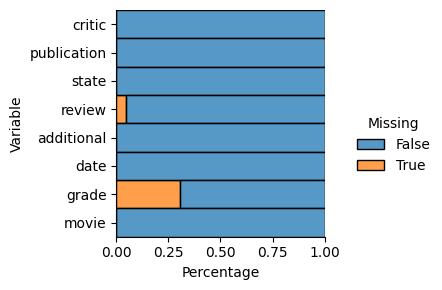

In [6]:
dfview=df.__deepcopy__()
ax=sns.displot(
    data=dfview.map(lambda x: False if x and not pd.isnull(x)  else True).melt(value_name='Missing'),
    y='variable',
    hue='Missing',
    multiple='fill',
    height=3,
    aspect=1.2
)
_=ax.set(xlabel="Percentage",ylabel="Variable")
# specifying a threshold value
# plt.axvline(0.4, color='r')

In [7]:
unique_values=[]
for col in df.columns:
    colunique=df[col].unique()
    col_info={
        "col":col,
        "unique":len(colunique),
        "total": df[df[col].map(lambda x: x is not None and (True if x else False))].shape[0],
    }
    col_info.update({"rounded_repeat_ratio":int(col_info["total"]/col_info["unique"])})
    col_info.update({
        "has_none": df[df[col].map(lambda x: x is None)].shape[0],
        "has_empty_string":df[df[col].map(lambda x: type(x) == str and (False if x else True))].shape[0]
    })
    unique_values.append(col_info)
pd.DataFrame(unique_values)

,col,unique,total,rounded_repeat_ratio,has_none,has_empty_string
0,critic,14854,1159528,78,0,0
1,publication,2767,1159528,419,0,0
2,state,2,1159528,579764,0,0
3,review,1093300,1105566,1,0,53962
4,additional,220887,1159528,5,0,0
5,date,8691,1159527,133,1,0
6,grade,899,802550,892,352720,0
7,movie,55184,1159528,21,0,0


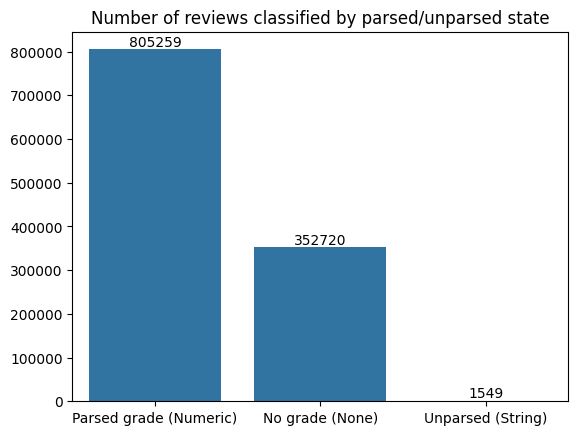

In [8]:
none_grade=df[df["grade"].map(lambda x: x is None)].shape[0]
unparsed_grade=df[df["grade"].map(lambda x: type(x) is str)].shape[0]
# fig=plt.figure(figsize=(10,5))
labels=["Parsed grade (Numeric)","No grade (None)","Unparsed (String)"]
values=[df.shape[0]-none_grade-unparsed_grade,none_grade,unparsed_grade]
ax=sns.barplot(None,x=labels,y=values)
_=ax.bar_label(ax.containers[0])
_=ax.set_title("Number of reviews classified by parsed/unparsed state")
# plt.pie([none_grade,unparsed_grade,df.shape[0]-none_grade-unparsed_grade],labels=["No grade","Unparsed","Has grade"],autopct="%.5f")
# plt.show()

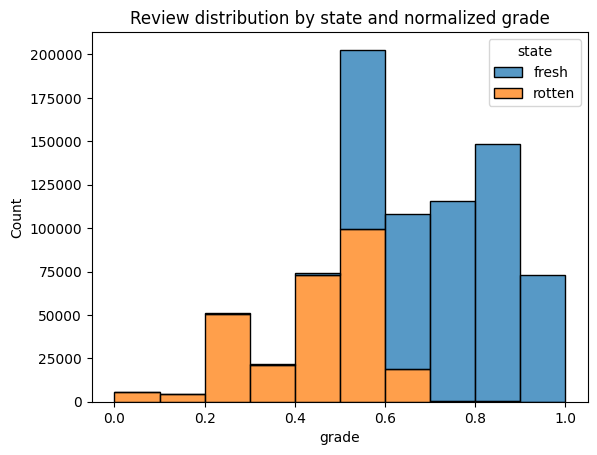

In [9]:
parsedgrade_view=df[~df["grade"].map(lambda x: x is None or type(x) is str)]
# count=parsedgrade_view["grade"].value_counts().reset_index()
ax=sns.histplot(parsedgrade_view,x="grade",hue="state",multiple="stack",bins=10)
_=ax.set_title("Review distribution by state and normalized grade")

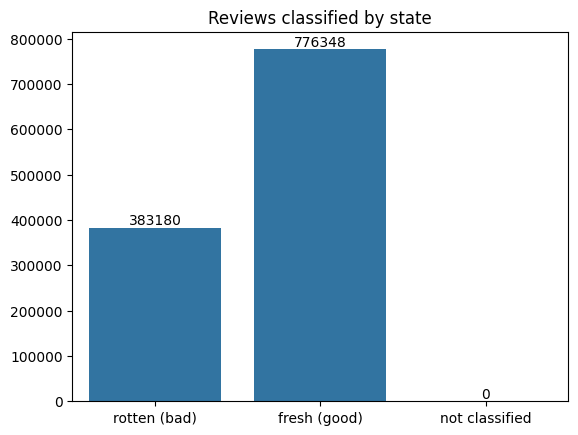

In [10]:
rotten_count=df[df["state"]=="rotten"].shape[0]
fresh_count=df[df["state"]=="fresh"].shape[0]
labels=["rotten (bad)","fresh (good)","not classified"]
values=[rotten_count,fresh_count,df.shape[0]-rotten_count-fresh_count]
ax=sns.barplot(None,x=labels,y=values)
_=ax.bar_label(ax.containers[0])
_=ax.set_title("Reviews classified by state")

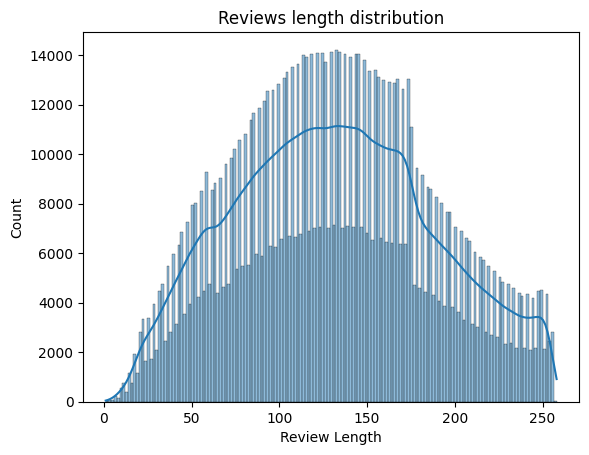

In [11]:
dfview=df.__deepcopy__()
dfview=dfview[dfview["review"].str.len()>0]
dfview["Review Length"]=dfview["review"].str.len()
ax=sns.histplot(dfview, x="Review Length",kde=True)
_=ax.set_title("Reviews length distribution")

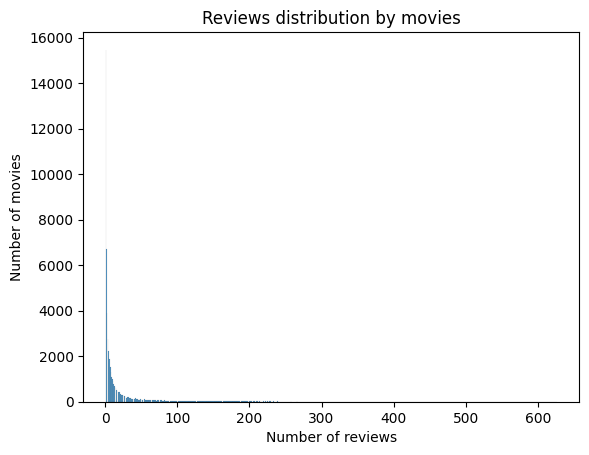

In [12]:
ax=sns.histplot(df["movie"].value_counts().reset_index(), x="count")
_=ax.set_title("Reviews distribution by movies")
_=ax.set(xlabel="Number of reviews",ylabel="Number of movies")

                      critic   state  count
0          5th Freedom Staff   fresh      3
1          A. Danson Michell   fresh      2
2        A. Fredric Franklyn  rotten      2
3            A. H. Frederick   fresh      1
4              A. Nolder Gay   fresh      1
...                      ...     ...    ...
22692    Ángel S. Harguindey   fresh      6
22693  Ángela Mariana Ávalos   fresh      1
22694  Ángela Mariana Ávalos  rotten      2
22695    Ángeles Pino Vilela   fresh      4
22696            Éric Rohmer   fresh      1

[22697 rows x 3 columns]
Reviewers with 3+ positive reviews: 7635
Reviewers with 3+ reviews: 8523
Total 12188


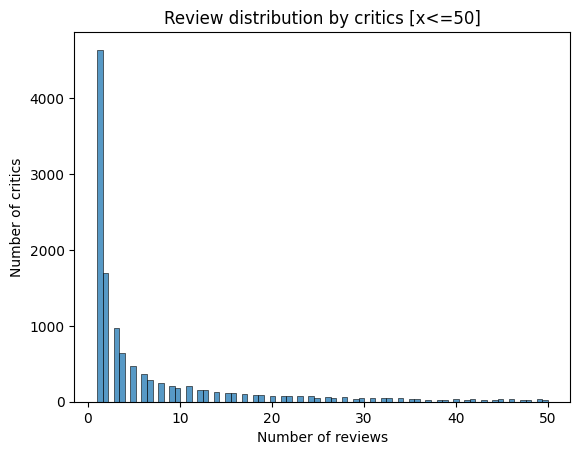

Total 2666


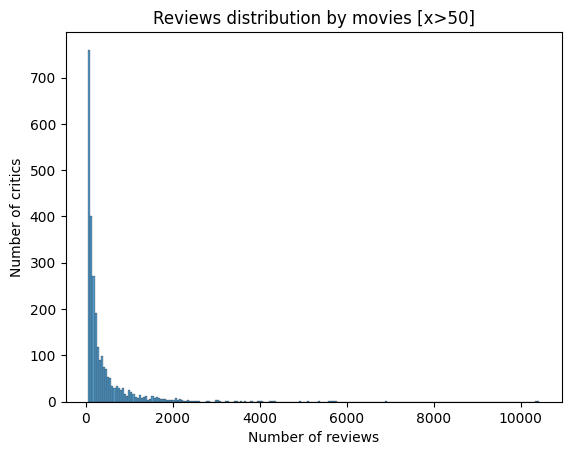

In [13]:
dfview=df.groupby(by=["critic","state"]).size().reset_index(name="count")
print(dfview)
print("Reviewers with 3+ positive reviews:",dfview[(dfview["count"]>=3) & (dfview["state"]=="fresh")].shape[0])
dfview=df["critic"].value_counts().reset_index()
print("Reviewers with 3+ reviews:",dfview[dfview["count"]>=3].shape[0])
sep=50
ax=sns.histplot(dfview[dfview["count"]<=sep], x="count")
_=ax.set_title(f"Review distribution by critics [x<={sep}]")
_=ax.set(xlabel="Number of reviews",ylabel="Number of critics")
print("Total",dfview[dfview["count"]<=sep].shape[0])
plt.show()
ax=sns.histplot(dfview[dfview["count"]>sep], x="count")
_=ax.set_title(f"Reviews distribution by movies [x>{sep}]")
_=ax.set(xlabel="Number of reviews",ylabel="Number of critics")
print("Total",dfview[dfview["count"]>sep].shape[0])
plt.show()

In [14]:
pattern=re.compile(r"https://www\.rottentomatoes\.com/m/([^/]+)")
metadatas=[]
with open("movie_list_enriched","r") as f:
    for line in f:
        meta:Dict=json.loads(line)
        for k,v in meta.items():
            title=pattern.findall(k)
            if not title:
                continue
            title=title[0]
            submeta=v.pop("meta",None)
            temp=dict(v,**{"movie":title})
            if submeta:
                for item in submeta:
                    descriptions=re.findall(r"[^:]+",item)
                    if len(descriptions)>=2:
                        temp.update({descriptions[0]:' '.join(descriptions[1:])})
                    else:
                        print(item)
            metadatas.append(temp)
metadf=pd.DataFrame(metadatas)
metadf

,description,movie,Director,Rating,Genre,Original Language,Release Date (Streaming),Runtime,Production Co,Producer,Writer,Release Date (Theaters),Release Date (DVD),Sound Mix,Distributor,Box Office (Gross USA),View the collection,Aspect Ratio,Rerelease Date (Theaters)
0,,riverdance_the_show,John McColgan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"A sheriff, a big-game hunter and a wildlife of...",lake_placid_2,David Flores,TV14,"Horror, Mystery & thriller",English,"Jul 2, 2018",1h 36m,"Unified Film Organization (UFO), Asgaard Ente...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Filmmaker Jeff Gibbs examines climate change, ...",planet_of_the_humans,Jeff Gibbs,NaN,Documentary,English,"Nov 20, 2020",1h 40m,"Rumble Media, Huron Mountain Films","Jeff Gibbs, Ozzie Zehner",Jeff Gibbs,"Apr 21, 2020 Limited",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,British soldier Eric Newby (Callum Blue) is ca...,in-love-and-war2001,John Kent Harrison,TVPG,"Romance, War",English,NaN,1h 30m,Hallmark Hall of Fame Productions,Brent Shields,John Mortimer,NaN,"Feb 26, 2002",Stereo,NaN,NaN,NaN,NaN,NaN
4,This film presents a dramatization of the wart...,the_story_of_dr_wassell,Cecil B. DeMille,NaN,Biography,English,NaN,2h 20m,Paramount,Cecil B. DeMille,"Alan Le May, Charles Bennett","Jul 4, 1944 Original",NaN,Stereo,Paramount Pictures,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55413,Filmmakers Ronit Avni and Julia Bacha examine ...,encounter_point,"Ronit Avni, Julia Bacha",NaN,Documentary,Arabic,NaN,1h 28m,NaN,NaN,NaN,"Nov 17, 2006 Limited","Jun 26, 2007",NaN,Just Vision,NaN,NaN,NaN,NaN
55414,While Col. James Braddock (Chuck Norris) was s...,braddock_missing_in_action_3,Aaron Norris,R,"Action, War",English,"Nov 5, 2019",1h 43m,"Golan-Globus Productions, The Cannon Group","Menahem Golan, Yoram Globus","James Bruner, Chuck Norris",NaN,NaN,Surround,NaN,$5.3M,NaN,NaN,NaN
55415,,50_first_kisses,Yûichi Fukuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55416,"When a baby is born who inexplicably grows, ev...",tom_of_your_life,Jeremy Sklar,NaN,"Comedy, Drama, Sci-fi",English,"Sep 1, 2020",1h 32m,Satori!Studios,James Sharpe,Jeremy Sklar,"Sep 1, 2020 Limited",NaN,NaN,NaN,NaN,NaN,NaN,NaN


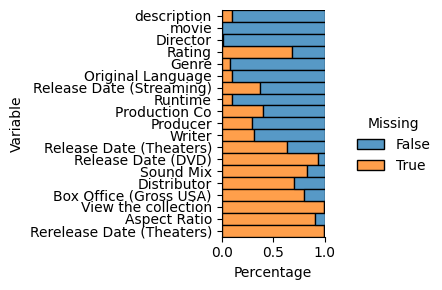

In [15]:
dfview=metadf.__deepcopy__()
ax=sns.displot(
    data=dfview.map(lambda x: False if x and not pd.isnull(x) else True).melt(value_name='Missing'),
    y='variable',
    hue='Missing',
    multiple='fill',
    height=3,
    aspect=1.2,
)
_=ax.set(xlabel="Percentage",ylabel="Variable")

In [16]:
metadf=metadf[["movie","description","Genre","Original Language","Director","Runtime"]]

In [17]:
notseentitle=set()
df_movie=set(df["movie"].unique())
print(len(df_movie))
metadf_movie=set(metadf["movie"].unique())
print(len(df_movie))
for m in df_movie:
    if m not in metadf_movie:
        notseentitle.add(m)
print(len(notseentitle))
print(notseentitle)
notseentitle=set()
for m in metadf_movie:
    if m not in df_movie:
        notseentitle.add(m)
print(len(notseentitle))
print(notseentitle)

55184
55184
11
{'the_river_1959', 'atman', 'puppet_2010', '1002361-big_town', 'land_2018_2', 'nishabd', 'abbeyfealegood', 'about_pie', 'kismet_1930', 'thelonious_monk_straight_no_chaser', 'last_dance_2000'}
233
{'fermats_room', 'hudas_salon', 'baby_geniuses', 'more_than_honey', 'time_out_of_mind_2015', 'cry_wolf_2005', '1068326-sabrina', 'last_tango_in_paris', 'time_to_leave', 'aeon_flux', 'driving_with_selvi', '1074022-lone_star', 'sanjuro', '1008074-gallipoli', 'dont_kill_it', '1147402-the_muppets_wizard_of_oz', 'bunraku', 'kurt_vonnegut_unstuck_in_time', 'seeking_a_friend_for_the_end_of_the_world', 'spirit_untamed', 'adrift_2018', 'catwoman', 'manto_2018', 'queen_of_katwe_2016', 'wetlands_2014', 'godzilla_2014', 'terror_of_mechagodzilla', 'not_another_teen_movie', '1021230-thief', 'love_sarah', 'the_lego_movie_2_the_second_part', 'arctic_dogs', 'powder_2011', 'eighth_grade', '1016937-pussinboots', 'nijinsky', 'john_dies_at_the_end', 'melody_time', '1101034-lost_souls', 'ghosted', 't

In [18]:
metadf[metadf.duplicated(keep=False)].sort_values(by="movie")

,movie,description,Genre,Original Language,Director,Runtime
17980,5_centimeters_per_second,"Young love, missed connections, and unrequited...","Drama, Romance, Animation",Japanese,Makoto Shinkai,1h 3m
36514,5_centimeters_per_second,"Young love, missed connections, and unrequited...","Drama, Romance, Animation",Japanese,Makoto Shinkai,1h 3m
8292,belle_2022,"Suzu is a shy, everyday high school student li...","Fantasy, Adventure, Anime, Romance, Musical",Japanese,Mamoru Hosoda,2h 1m
20896,belle_2022,"Suzu is a shy, everyday high school student li...","Fantasy, Adventure, Anime, Romance, Musical",Japanese,Mamoru Hosoda,2h 1m
15773,howls_moving_castle,Sophie (Emily Mortimer) has an uneventful life...,"Fantasy, Anime",Japanese,Hayao Miyazaki,1h 59m
39095,howls_moving_castle,Sophie (Emily Mortimer) has an uneventful life...,"Fantasy, Anime",Japanese,Hayao Miyazaki,1h 59m
24396,macross_plus_movie_edition,"In the year 2040, on the distant planet Eden, ...","Sci-fi, Anime",Japanese,"Shoji Kawamori, Shinichirô Watanabe",1h 55m
40669,macross_plus_movie_edition,"In the year 2040, on the distant planet Eden, ...","Sci-fi, Anime",Japanese,"Shoji Kawamori, Shinichirô Watanabe",1h 55m
9865,nausicaa_of_the_valley_of_the_wind,"Far in the future, after an apocalyptic confli...","Fantasy, Anime",Japanese,Hayao Miyazaki,1h 58m
30892,nausicaa_of_the_valley_of_the_wind,"Far in the future, after an apocalyptic confli...","Fantasy, Anime",Japanese,Hayao Miyazaki,1h 58m


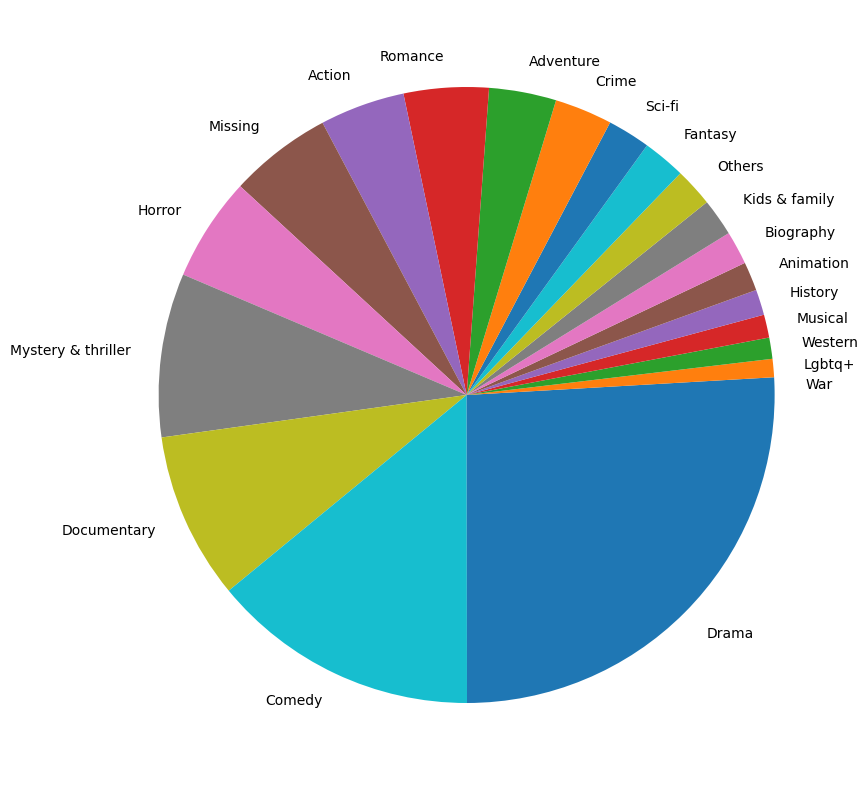

/tmp/ipykernel_386383/2660706584.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


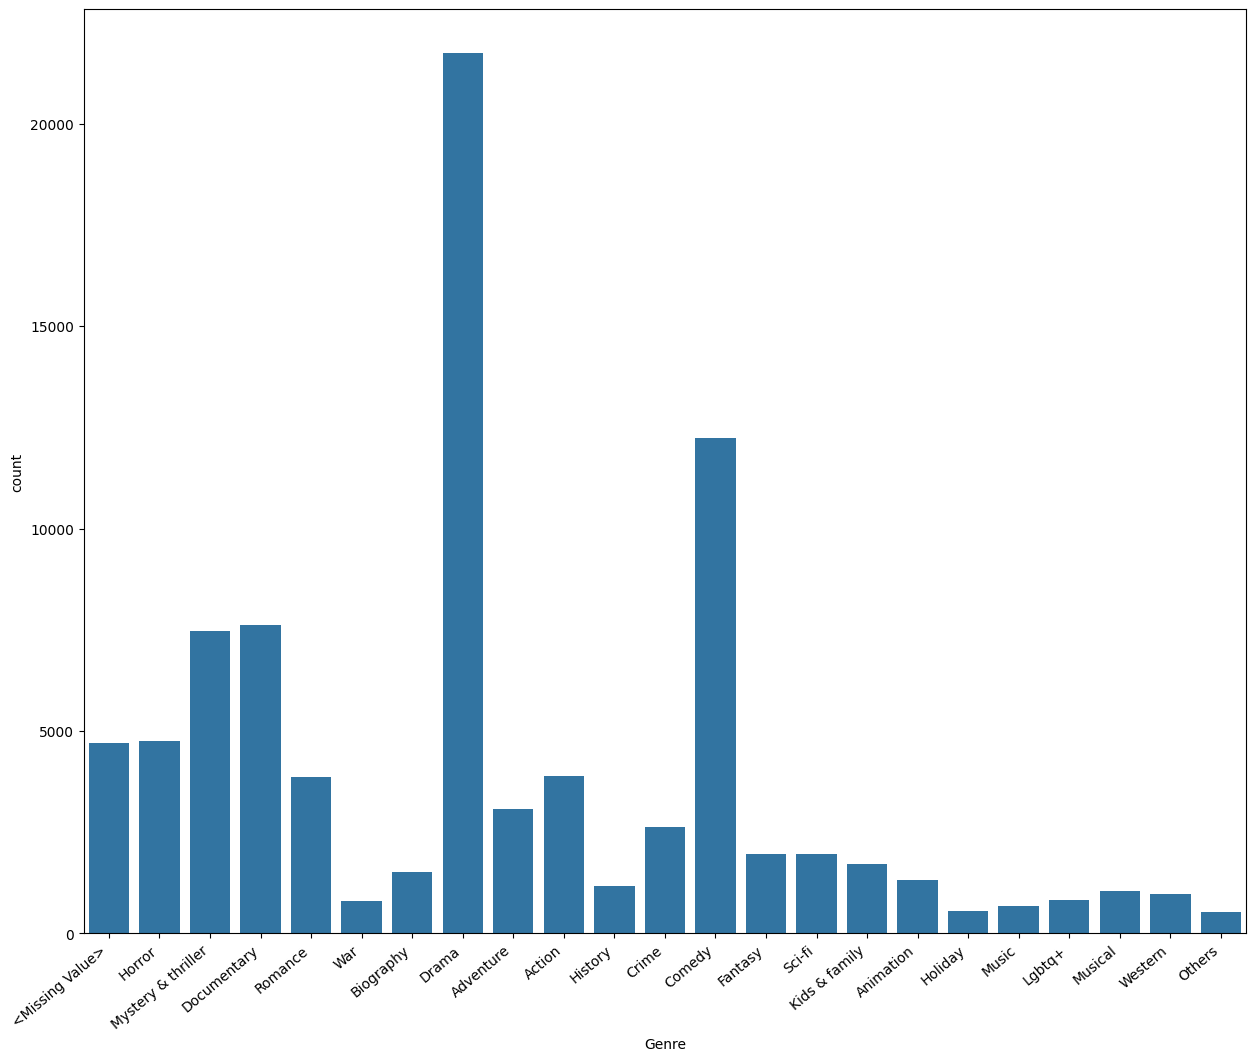

In [19]:
dfview=metadf.__deepcopy__()
gcount={}
for row in dfview.iloc:
    g=row["Genre"]
    if pd.isnull(g):
        genres=["Missing"]
    else:
        genres=list(map(str.strip,g.split(",")))
    for g in genres:
            gcount[g]=gcount.get(g,0)+1
others=0
for k,v in list(gcount.items()):
    if v<700:
        others+=gcount.pop(k,0)     
gcount.update({"Others":others}) 
dfcount=pd.DataFrame(gcount.items(),columns=["Genre","count"]).sort_values(by="count")

plt.figure(figsize=(10,10))
_=plt.pie(x=dfcount["count"],labels=dfcount["Genre"])
plt.show()

gcount={}
for row in dfview.iloc:
    g=row["Genre"]
    if pd.isnull(g):
        genres=["<Missing Value>"]
    else:
        genres=list(map(str.strip,g.split(",")))
    for g in genres:
            gcount[g]=gcount.get(g,0)+1
others=0
for k,v in list(gcount.items()):
    if v<500:
        others+=gcount.pop(k,0)     
gcount.update({"Others":others}) 
dfcount=pd.DataFrame(gcount.items(),columns=["Genre","count"])
plt.figure(figsize=(15,12))
ax=sns.barplot(data=dfcount,x="Genre",y="count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

/tmp/ipykernel_386383/1316059243.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


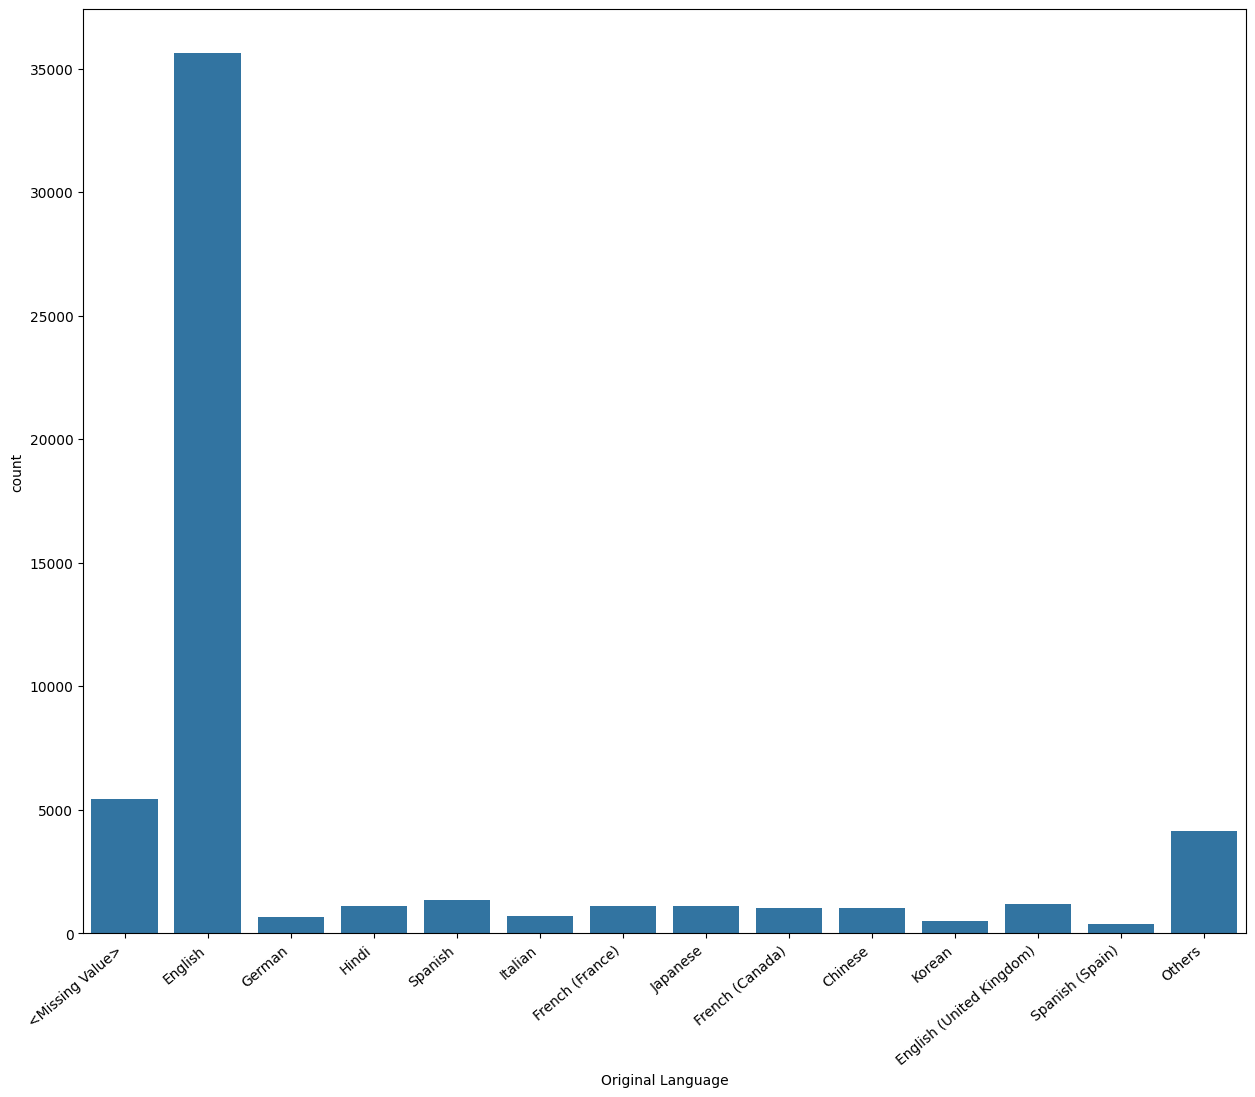

In [20]:
dfview=metadf.__deepcopy__()
gcount={}
for row in dfview.iloc:
    g=row["Original Language"]
    if pd.isnull(g):
        genres=["<Missing Value>"]
    else:
        genres=list(map(str.strip,g.split(",")))
    for g in genres:
            gcount[g]=gcount.get(g,0)+1
others=0
for k,v in list(gcount.items()):
    if v<300:
        others+=gcount.pop(k,0)     
gcount.update({"Others":others}) 
dfcount=pd.DataFrame(gcount.items(),columns=["Original Language","count"])
plt.figure(figsize=(15,12))
ax=sns.barplot(data=dfcount,x="Original Language",y="count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

/tmp/ipykernel_386383/3271986383.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


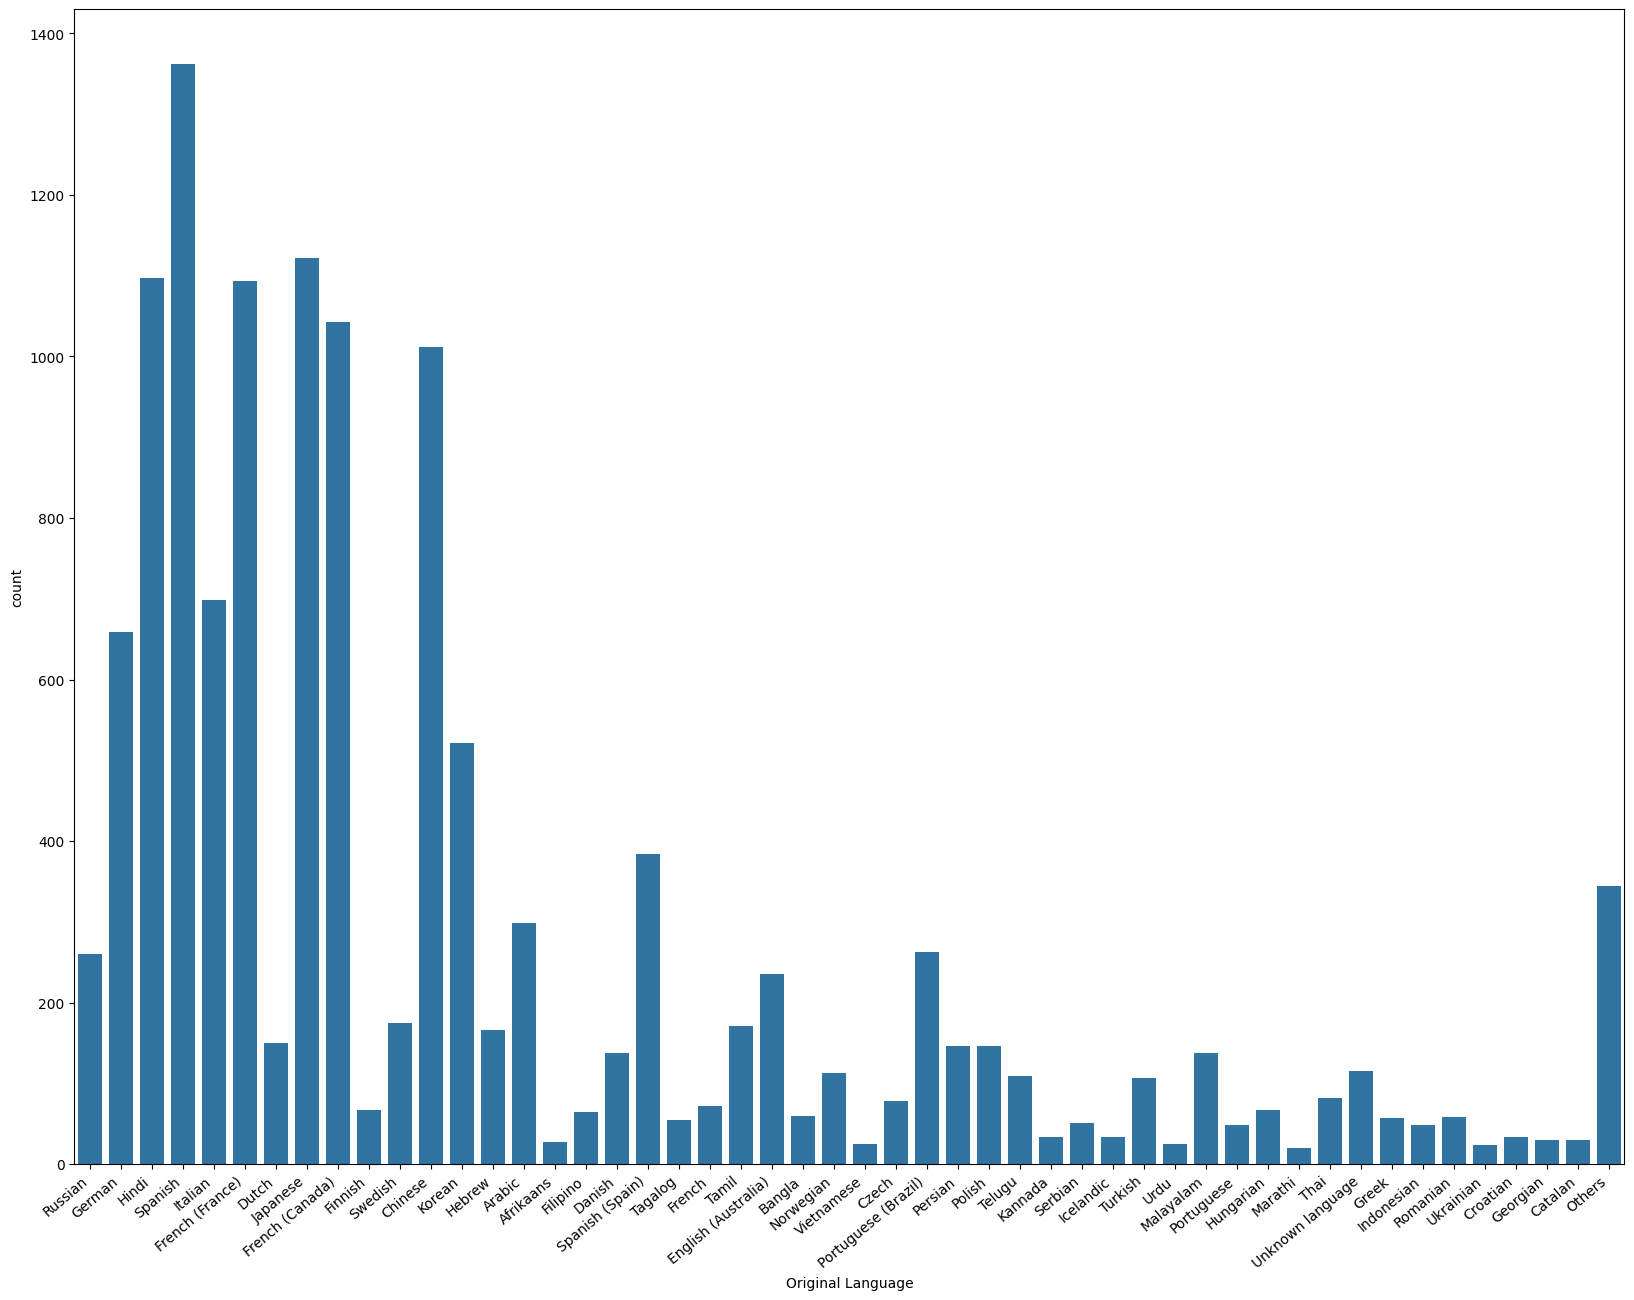

In [24]:
dfview=metadf.__deepcopy__()
gcount={}
for row in dfview.iloc:
    g=row["Original Language"]
    if pd.isnull(g):
        genres=["<Missing Value>"]
    else:
        genres=list(map(str.strip,g.split(",")))
    for g in genres:
            gcount[g]=gcount.get(g,0)+1
others=0
del gcount["English"]
del gcount["English (United Kingdom)"]
del gcount["<Missing Value>"]
for k,v in list(gcount.items()):
    if v<20:
        others+=gcount.pop(k,0)     
gcount.update({"Others":others}) 
dfcount=pd.DataFrame(gcount.items(),columns=["Original Language","count"])
plt.figure(figsize=(20,15))
ax=sns.barplot(data=dfcount,x="Original Language",y="count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

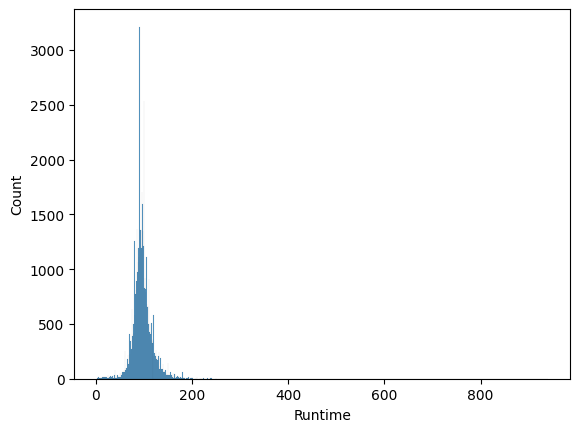

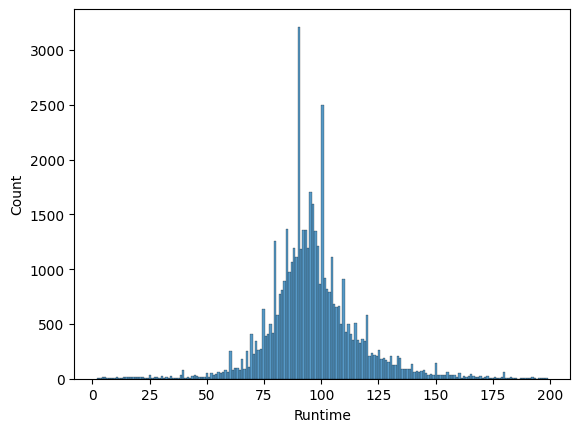

In [22]:
dfview=metadf.__deepcopy__()
def parseTime(x:str):
    nums=list(map(int,re.findall("\d+",x)))
    nums.reverse()
    if len(nums)>2:
        print(x)
        raise Exception
    multifactor=1
    for i in range(len(nums)):
        nums[i]*=multifactor
        multifactor*=60
    result=sum(nums)
    if result==0:
        return None
    return result
dfview["Runtime"]=dfview["Runtime"].astype(str)
dfview["Runtime"]=dfview["Runtime"].map(parseTime)
_=sns.histplot(data=dfview[dfview["Runtime"].notna()],x="Runtime")
plt.show()
_=sns.histplot(data=dfview[(dfview["Runtime"].notna()) & (dfview["Runtime"]<200)],x="Runtime")
plt.show()
